In [10]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from preprocess import slice_histogram_match
from datasets import load_image
np.random.seed(1314)
# Get require data
types = ['C0LGE','LGE','T2LGE']
need_data = load_image(str=types,paired_label=True)
image = need_data['image']
label = need_data['label']

# Split dataset(just simply split to train|valid[8:2])
state = np.random.get_state()
np.random.shuffle(image)
np.random.set_state(state)
np.random.shuffle(label)
index = int(len(image) * 0.8)
train_data = {'image':image[:index],'label':label[:index]}
valid_data = {'image':image[index:],'label':label[index:]}

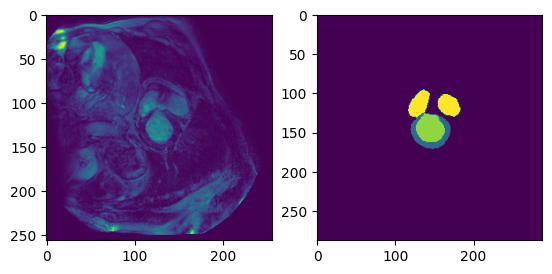

In [11]:
index = 10
image = train_data['image'][index]
label = train_data['label'][index]
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(label)